# Introduction to Word Embeddings

---

## Table of Contents
1. [Introduction](#introduction)
2. [Limitations of Traditional Methods](#limitations)
3. [What are Word Embeddings?](#what-are-embeddings)
4. [Benefits of Word Embeddings](#benefits)
5. [Types of Word Embeddings](#types)
6. [Understanding Semantic Similarity](#semantic-similarity)
7. [Word Embedding Properties](#properties)
8. [Getting Started with Pre-trained Embeddings](#pretrained)
9. [Preparing for Word2Vec](#preparing)

---

## 1. Introduction <a id='introduction'></a>

So far, we've learned classical text representation methods:
- **One-Hot Encoding**: Binary sparse vectors
- **Bag of Words**: Count-based representation
- **TF-IDF**: Weighted word importance

### The Problem:

All these methods have a critical limitation: **They don't capture semantic meaning**.

```
Traditional Methods:
  "king" and "queen" → No relationship captured
  "king" and "monarch" → No relationship captured
  "king" and "pizza" → Same distance as "king" and "queen"

Word Embeddings:
  "king" and "queen" → Close in vector space (similar meaning)
  "king" and "monarch" → Close in vector space (synonyms)
  "king" and "pizza" → Far apart (unrelated)
```

### The Solution: Word Embeddings

**Word embeddings** are dense, low-dimensional vectors that capture semantic relationships between words.

In [1]:
# Setup: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

# For word embeddings
import gensim.downloader as api

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Limitations of Traditional Methods <a id='limitations'></a>

Let's revisit why traditional methods fall short.

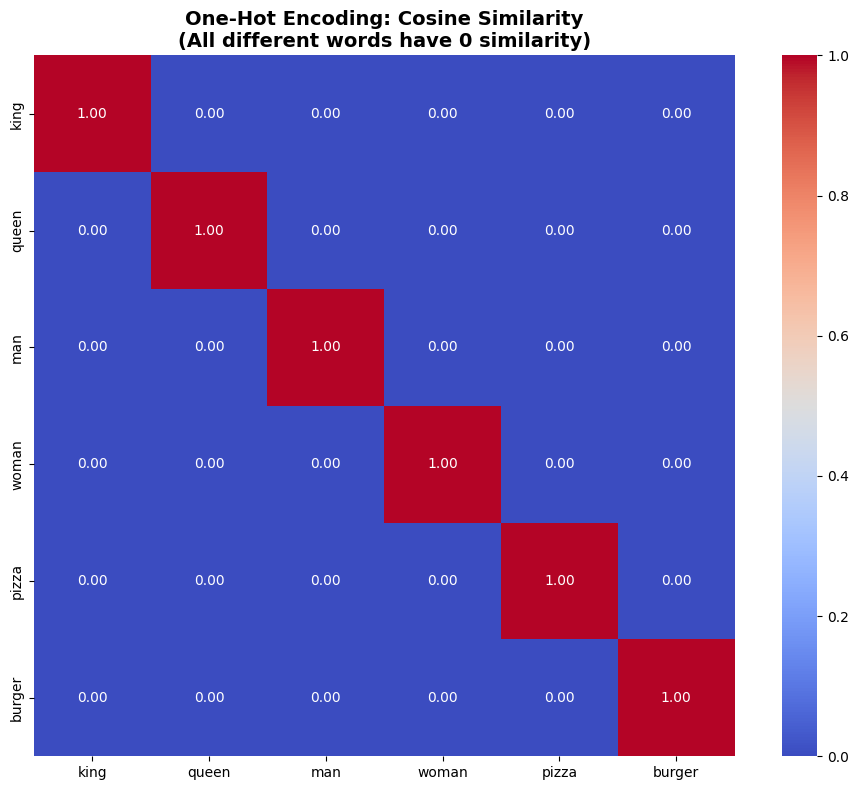

Problem: Traditional methods treat all words as equally different!
'king' vs 'queen' = 0 similarity (should be high)
'king' vs 'pizza' = 0 similarity (correct)

No semantic relationship captured!


In [2]:
# Demonstrate limitations of one-hot encoding

from sklearn.feature_extraction.text import CountVectorizer

# Related words
words = ['king', 'queen', 'man', 'woman', 'pizza', 'burger']

# Create one-hot-like representation using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(words)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(X)

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, 
            annot=True, 
            fmt='.2f',
            xticklabels=words,
            yticklabels=words,
            cmap='coolwarm',
            vmin=0, vmax=1,
            square=True)
plt.title('One-Hot Encoding: Cosine Similarity\n(All different words have 0 similarity)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Problem: Traditional methods treat all words as equally different!")
print("'king' vs 'queen' = 0 similarity (should be high)")
print("'king' vs 'pizza' = 0 similarity (correct)")
print("\nNo semantic relationship captured!")

### Key Limitations:

1. **No Semantic Similarity**
   - "happy" and "joyful" are treated as completely different
   - No notion of synonyms or related words

2. **High Dimensionality**
   - Vocabulary size can be 10,000-100,000+ words
   - Each word = one dimension
   - Extremely sparse vectors (mostly zeros)

3. **No Context**
   - "bank" (river bank) vs "bank" (financial institution)
   - Traditional methods can't distinguish

4. **Fixed Vocabulary**
   - Can't handle out-of-vocabulary words
   - New words = complete unknowns

## 3. What are Word Embeddings? <a id='what-are-embeddings'></a>

**Word embeddings** are dense vector representations of words in a continuous vector space.

### Key Characteristics:

```
One-Hot Encoding:
  "king" → [0, 0, 0, 1, 0, 0, ..., 0]  (10,000 dimensions, sparse)
  
Word Embedding:
  "king" → [0.2, -0.5, 0.8, ..., 0.1]  (50-300 dimensions, dense)
```

### Properties:

1. **Dense**: Every dimension has a meaningful value (not mostly zeros)
2. **Low-dimensional**: Typically 50-300 dimensions (vs 10,000+ for one-hot)
3. **Learned**: Automatically learned from data
4. **Semantic**: Similar words have similar vectors

### How are Embeddings Created?

**Core Idea**: "*You shall know a word by the company it keeps*" - J.R. Firth

Words that appear in similar contexts have similar meanings:

```
"The cat sat on the mat"
"The dog sat on the rug"

→ "cat" and "dog" appear in similar contexts
→ Embeddings will be similar
```

In [3]:
# Conceptual comparison

comparison = {
    'Aspect': ['Dimensionality', 'Sparsity', 'Semantic Meaning', 'Training Required', 
               'Memory Usage', 'Similarity Calculation'],
    'One-Hot / BoW': ['10,000+', 'Very Sparse (99%+ zeros)', 'None', 'No', 
                      'High', 'Not meaningful'],
    'TF-IDF': ['10,000+', 'Sparse', 'Weak (via IDF)', 'No', 
               'High', 'Document similarity only'],
    'Word Embeddings': ['50-300', 'Dense (all values)', 'Strong', 'Yes', 
                        'Low', 'Semantic similarity']
}

df_comparison = pd.DataFrame(comparison)

print("Comparison: Traditional vs Embeddings\n")
print("="*100)
print(df_comparison.to_string(index=False))

Comparison: Traditional vs Embeddings

                Aspect            One-Hot / BoW                   TF-IDF     Word Embeddings
        Dimensionality                  10,000+                  10,000+              50-300
              Sparsity Very Sparse (99%+ zeros)                   Sparse  Dense (all values)
      Semantic Meaning                     None           Weak (via IDF)              Strong
     Training Required                       No                       No                 Yes
          Memory Usage                     High                     High                 Low
Similarity Calculation           Not meaningful Document similarity only Semantic similarity


## 4. Benefits of Word Embeddings <a id='benefits'></a>

### 1. Semantic Similarity

Similar words have similar vectors:
- "happy" ≈ "joyful" ≈ "pleased"
- "king" ≈ "queen" ≈ "monarch"

### 2. Analogical Reasoning

Amazing property: Vector arithmetic works!

```
king - man + woman ≈ queen
Paris - France + Italy ≈ Rome
walking - walk + swim ≈ swimming
```

### 3. Dimensionality Reduction

- From 10,000+ dimensions to 50-300
- Faster computation
- Less memory
- Better generalization

### 4. Transfer Learning

- Pre-trained on massive corpora (Wikipedia, news, books)
- Can be used for any task
- Don't need to train from scratch

### 5. Better Performance

- Improves performance on:
  - Sentiment analysis
  - Text classification
  - Machine translation
  - Question answering
  - And more!

## 5. Types of Word Embeddings <a id='types'></a>

### Popular Word Embedding Models:

| Model | Year | Description | Dimensions | Training Data |
|-------|------|-------------|------------|---------------|
| **Word2Vec** | 2013 | Predicts context from word or vice versa | 100-300 | Google News (100B words) |
| **GloVe** | 2014 | Global word co-occurrence statistics | 50-300 | Wikipedia + Gigaword (6B tokens) |
| **FastText** | 2016 | Subword information (handles rare words) | 100-300 | Wikipedia + Common Crawl |
| **ELMo** | 2018 | Context-dependent (same word, different embeddings) | 1024 | 1 Billion Word Benchmark |
| **BERT** | 2018 | Bidirectional context, transformer-based | 768-1024 | Wikipedia + BookCorpus |

### In This Course:

We'll focus on **Word2Vec** (next notebook) as it's:
- Fundamental to understanding embeddings
- Widely used
- Relatively simple
- Great for learning the concepts

### Context-Independent vs Context-Dependent:

**Context-Independent (Word2Vec, GloVe, FastText):**
- One vector per word, regardless of context
- "bank" always has the same embedding

**Context-Dependent (ELMo, BERT):**
- Different vectors based on context
- "I went to the bank" (financial) ≠ "river bank" (shore)

## 6. Understanding Semantic Similarity <a id='semantic-similarity'></a>

Let's explore semantic similarity using pre-trained embeddings.

In [4]:
# Load pre-trained word embeddings
# This will download if not already cached (~65 MB)

print("Loading pre-trained Word2Vec embeddings...")
print("(This may take a minute for first-time download)\n")

# Load a smaller pre-trained model
# 'glove-wiki-gigaword-50' = GloVe embeddings, 50 dimensions
embeddings = api.load('glove-wiki-gigaword-50')

print("✓ Embeddings loaded successfully!")
print(f"\nVocabulary size: {len(embeddings)} words")
print(f"Vector dimensions: {embeddings.vector_size}")

Loading pre-trained Word2Vec embeddings...
(This may take a minute for first-time download)

[==================================================] 100.0% 66.0/66.0MB downloaded
✓ Embeddings loaded successfully!

Vocabulary size: 400000 words
Vector dimensions: 50


In [5]:
# Get vector for a word

word = 'king'
vector = embeddings[word]

print(f"Word: '{word}'")
print(f"\nVector (first 10 dimensions): {vector[:10]}")
print(f"Vector shape: {vector.shape}")
print(f"\nFull vector:")
print(vector)

Word: 'king'

Vector (first 10 dimensions): [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]
Vector shape: (50,)

Full vector:
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


In [6]:
# Find similar words

def find_similar_words(word, topn=10):
    """
    Find most similar words to a given word.
    """
    try:
        similar = embeddings.most_similar(word, topn=topn)
        return similar
    except KeyError:
        return f"Word '{word}' not in vocabulary"

# Test with different words
test_words = ['king', 'happy', 'computer', 'france']

print("Finding Similar Words:\n")
print("="*80)

for word in test_words:
    similar = find_similar_words(word, topn=5)
    
    print(f"\nMost similar to '{word}':")
    print(f"{'Word':<20} {'Similarity Score'}")
    print("-"*40)
    
    for similar_word, score in similar:
        print(f"{similar_word:<20} {score:.4f}")
    print("-"*80)

Finding Similar Words:


Most similar to 'king':
Word                 Similarity Score
----------------------------------------
prince               0.8236
queen                0.7839
ii                   0.7746
emperor              0.7736
son                  0.7667
--------------------------------------------------------------------------------

Most similar to 'happy':
Word                 Similarity Score
----------------------------------------
'm                   0.9142
everyone             0.8976
everybody            0.8965
really               0.8840
me                   0.8785
--------------------------------------------------------------------------------

Most similar to 'computer':
Word                 Similarity Score
----------------------------------------
computers            0.9165
software             0.8815
technology           0.8526
electronic           0.8126
internet             0.8060
-----------------------------------------------------------------------------

In [7]:
# Calculate similarity between word pairs

word_pairs = [
    ('king', 'queen'),      # Related
    ('king', 'man'),        # Related
    ('king', 'monarch'),    # Synonyms
    ('happy', 'joyful'),    # Synonyms
    ('happy', 'sad'),       # Antonyms
    ('king', 'pizza'),      # Unrelated
    ('cat', 'dog'),         # Same category
    ('paris', 'france'),    # Capital-country
]

print("Word Pair Similarities:\n")
print("="*60)
print(f"{'Word 1':<15} {'Word 2':<15} {'Similarity':<12} {'Relationship'}")
print("-"*60)

for word1, word2 in word_pairs:
    try:
        similarity = embeddings.similarity(word1, word2)
        
        # Categorize relationship
        if similarity > 0.7:
            relationship = "Very similar"
        elif similarity > 0.5:
            relationship = "Similar"
        elif similarity > 0.3:
            relationship = "Somewhat related"
        else:
            relationship = "Unrelated"
        
        print(f"{word1:<15} {word2:<15} {similarity:<12.4f} {relationship}")
    except KeyError as e:
        print(f"{word1:<15} {word2:<15} {'N/A':<12} Word not found")

Word Pair Similarities:

Word 1          Word 2          Similarity   Relationship
------------------------------------------------------------
king            queen           0.7839       Very similar
king            man             0.5309       Similar
king            monarch         0.7193       Very similar
happy           joyful          0.5550       Similar
happy           sad             0.6891       Similar
king            pizza           0.2204       Unrelated
cat             dog             0.9218       Very similar
paris           france          0.8025       Very similar


## 7. Word Embedding Properties <a id='properties'></a>

### Amazing Property: Vector Arithmetic!

Word embeddings exhibit remarkable algebraic properties.

In [8]:
# Famous example: king - man + woman ≈ queen

def analogy(word1, word2, word3, topn=5):
    """
    Solve analogy: word1 is to word2 as word3 is to ___?
    Example: king is to man as queen is to ___?
    """
    try:
        result = embeddings.most_similar(
            positive=[word3, word2],
            negative=[word1],
            topn=topn
        )
        return result
    except KeyError as e:
        return f"Word not found: {e}"

# Test classic analogies
analogies = [
    ('man', 'king', 'woman'),        # woman is to ? (expect: queen)
    ('france', 'paris', 'italy'),    # italy is to ? (expect: rome)
    ('walk', 'walking', 'swim'),     # swim is to ? (expect: swimming)
    ('good', 'better', 'bad'),       # bad is to ? (expect: worse)
]

print("Word Analogy Examples:\n")
print("="*80)

for word1, word2, word3 in analogies:
    result = analogy(word1, word2, word3, topn=3)
    
    print(f"\n'{word1}' is to '{word2}' as '{word3}' is to:")
    print("-"*50)
    
    if isinstance(result, list):
        for word, score in result:
            print(f"  {word:<20} (confidence: {score:.4f})")
    else:
        print(f"  {result}")

Word Analogy Examples:


'man' is to 'king' as 'woman' is to:
--------------------------------------------------
  queen                (confidence: 0.8524)
  throne               (confidence: 0.7664)
  prince               (confidence: 0.7592)

'france' is to 'paris' as 'italy' is to:
--------------------------------------------------
  rome                 (confidence: 0.8466)
  milan                (confidence: 0.7766)
  turin                (confidence: 0.7666)

'walk' is to 'walking' as 'swim' is to:
--------------------------------------------------
  swimming             (confidence: 0.8072)
  swimmers             (confidence: 0.7504)
  swims                (confidence: 0.7455)

'good' is to 'better' as 'bad' is to:
--------------------------------------------------
  worse                (confidence: 0.9011)
  too                  (confidence: 0.8324)
  unfortunately        (confidence: 0.8224)


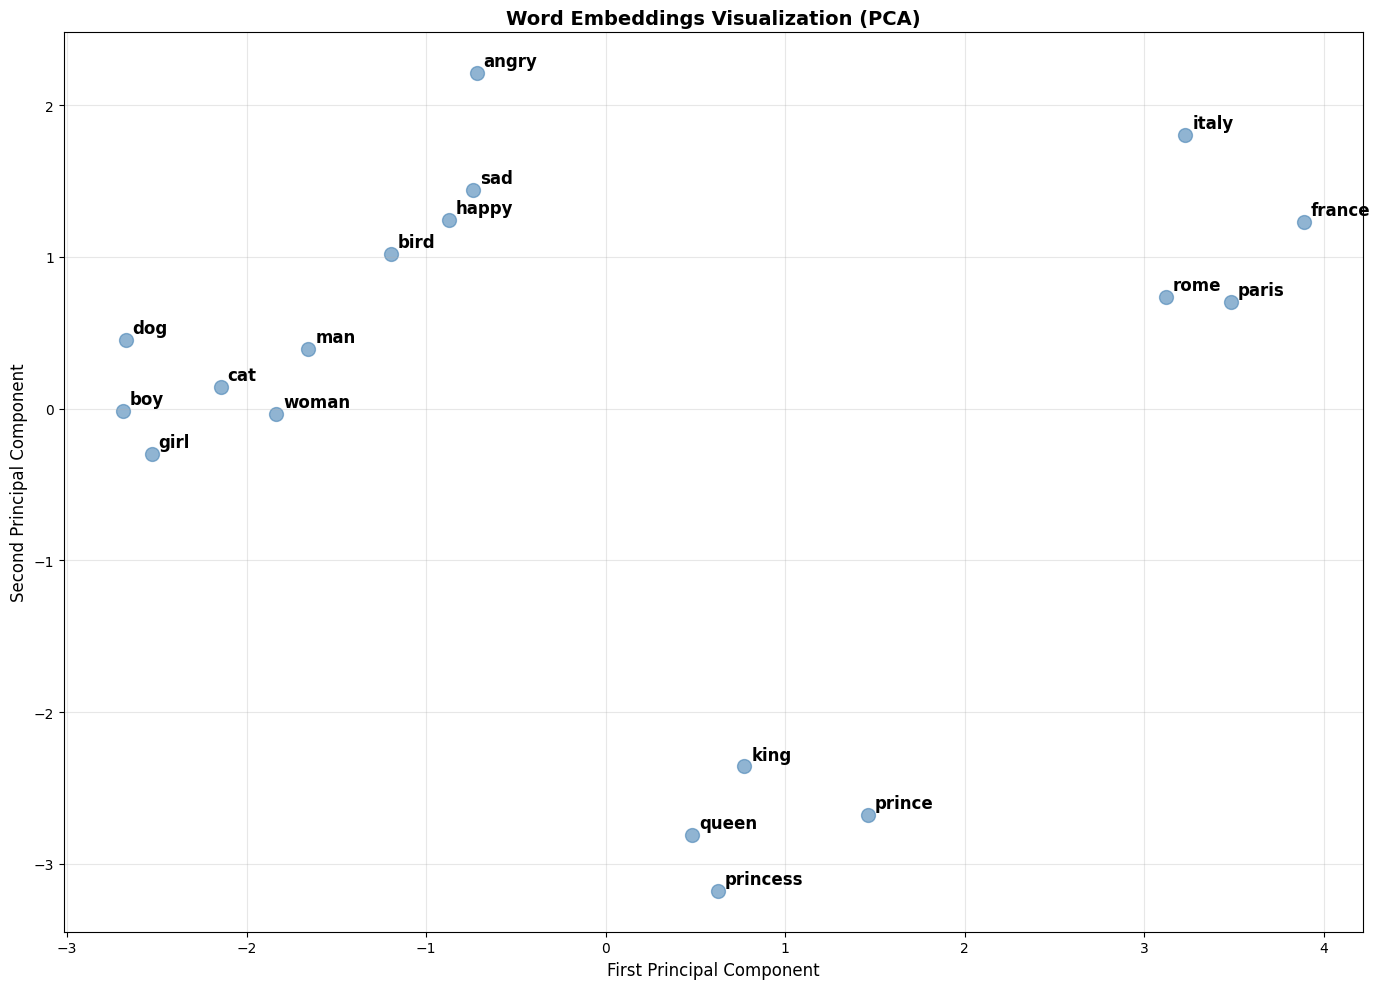

Notice how related words cluster together!
- Royalty words are near each other
- Animals cluster together
- Countries and capitals form patterns


In [9]:
# Visualize word relationships

# Select words to visualize
words_to_plot = [
    # Royalty
    'king', 'queen', 'prince', 'princess',
    # Gender
    'man', 'woman', 'boy', 'girl',
    # Countries and capitals
    'france', 'paris', 'italy', 'rome',
    # Animals
    'cat', 'dog', 'bird',
    # Emotions
    'happy', 'sad', 'angry',
]

# Get vectors
vectors = np.array([embeddings[word] for word in words_to_plot])

# Reduce to 2D using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(14, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=100, alpha=0.6, c='steelblue')

# Add labels
for i, word in enumerate(words_to_plot):
    plt.annotate(word, 
                xy=(vectors_2d[i, 0], vectors_2d[i, 1]),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=12,
                fontweight='bold')

plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('Word Embeddings Visualization (PCA)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Notice how related words cluster together!")
print("- Royalty words are near each other")
print("- Animals cluster together")
print("- Countries and capitals form patterns")

## 8. Getting Started with Pre-trained Embeddings <a id='pretrained'></a>

Using pre-trained embeddings for your ML tasks.

In [10]:
# Convert text to embeddings

def text_to_embedding(text):
    """
    Convert text to average word embedding.
    This is a simple approach - more sophisticated methods exist.
    """
    words = text.lower().split()
    
    # Get embeddings for words that exist in vocabulary
    word_vectors = []
    for word in words:
        try:
            word_vectors.append(embeddings[word])
        except KeyError:
            # Word not in vocabulary, skip it
            pass
    
    if len(word_vectors) == 0:
        # No words found, return zero vector
        return np.zeros(embeddings.vector_size)
    
    # Average all word vectors
    return np.mean(word_vectors, axis=0)

# Test sentences
sentences = [
    "The king rules the kingdom",
    "The queen is very powerful",
    "I love eating pizza",
    "Dogs and cats are pets",
]

print("Text to Embedding Conversion:\n")
print("="*80)

sentence_embeddings = []
for sentence in sentences:
    embedding = text_to_embedding(sentence)
    sentence_embeddings.append(embedding)
    
    print(f"Sentence: '{sentence}'")
    print(f"Embedding (first 5 dims): {embedding[:5]}")
    print(f"Shape: {embedding.shape}\n")

# Calculate similarities between sentences
print("\nSentence Similarities:\n")
print(f"{'Sentence 1':<35} {'Sentence 2':<35} {'Similarity'}")
print("-"*80)

for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        sim = cosine_similarity(
            sentence_embeddings[i].reshape(1, -1),
            sentence_embeddings[j].reshape(1, -1)
        )[0][0]
        
        sent1 = sentences[i][:32] + "..." if len(sentences[i]) > 32 else sentences[i]
        sent2 = sentences[j][:32] + "..." if len(sentences[j]) > 32 else sentences[j]
        
        print(f"{sent1:<35} {sent2:<35} {sim:.4f}")

Text to Embedding Conversion:

Sentence: 'The king rules the kingdom'
Embedding (first 5 dims): [ 0.11478601  0.1151496  -0.637802    0.0536378   0.1608    ]
Shape: (50,)

Sentence: 'The queen is very powerful'
Embedding (first 5 dims): [ 0.52682     0.38574892 -0.44183797  0.059582    0.634352  ]
Shape: (50,)

Sentence: 'I love eating pizza'
Embedding (first 5 dims): [ 0.28281748  0.11088499 -0.74564576 -0.35931748  0.86337745]
Shape: (50,)

Sentence: 'Dogs and cats are pets'
Embedding (first 5 dims): [ 0.651352   -0.4200428  -0.159316   -0.35365862  0.153454  ]
Shape: (50,)


Sentence Similarities:

Sentence 1                          Sentence 2                          Similarity
--------------------------------------------------------------------------------
The king rules the kingdom          The queen is very powerful          0.8744
The king rules the kingdom          I love eating pizza                 0.5437
The king rules the kingdom          Dogs and cats are pets           

## 9. Preparing for Word2Vec <a id='preparing'></a>

In the next notebook, we'll dive deep into Word2Vec:
- How it works internally
- Training your own embeddings
- Skip-gram vs CBOW architectures
- Practical applications

### Key Concepts to Remember:

1. **Embeddings are learned, not designed**
   - Model learns from data
   - No manual feature engineering

2. **Context matters**
   - Words in similar contexts → similar embeddings
   - "You shall know a word by the company it keeps"

3. **Dense, low-dimensional**
   - 50-300 dimensions vs 10,000+
   - More efficient and effective

4. **Capture semantic relationships**
   - Similarity
   - Analogies
   - Clustering

In [11]:
# Summary visualization: Traditional vs Embeddings

# Sample words
words_compare = ['king', 'queen', 'man', 'woman']

# Get embedding vectors
embed_vectors = np.array([embeddings[word] for word in words_compare])

# Reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
embed_2d = tsne.fit_transform(embed_vectors)

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: One-hot encoding (conceptual)
ax1.scatter([0, 1, 2, 3], [0, 0, 0, 0], s=200, c='gray', alpha=0.5)
for i, word in enumerate(words_compare):
    ax1.annotate(word, (i, 0), fontsize=14, ha='center', va='bottom')
ax1.set_xlim(-0.5, 3.5)
ax1.set_ylim(-0.5, 0.5)
ax1.set_title('One-Hot Encoding\n(All words equally distant)', fontsize=14, fontweight='bold')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.text(1.5, -0.3, 'No semantic relationship', ha='center', fontsize=12, style='italic')

# Right: Word embeddings
ax2.scatter(embed_2d[:, 0], embed_2d[:, 1], s=200, c='steelblue', alpha=0.6)
for i, word in enumerate(words_compare):
    ax2.annotate(word, (embed_2d[i, 0], embed_2d[i, 1]), 
                fontsize=14, fontweight='bold',
                xytext=(5, 5), textcoords='offset points')
ax2.set_title('Word Embeddings\n(Similar words close together)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Dimension 1', fontsize=12)
ax2.set_ylabel('Dimension 2', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Difference:")
print("  Left:  Traditional methods treat all words as equally different")
print("  Right: Embeddings capture semantic relationships")

ValueError: perplexity must be less than n_samples

## Summary

In this notebook, we covered:

✅ **Limitations of Traditional Methods**: High dimensionality, no semantic meaning  
✅ **What are Word Embeddings**: Dense, low-dimensional vector representations  
✅ **Benefits**: Semantic similarity, analogical reasoning, dimensionality reduction  
✅ **Types of Embeddings**: Word2Vec, GloVe, FastText, ELMo, BERT  
✅ **Semantic Similarity**: Finding related words, calculating similarities  
✅ **Amazing Properties**: Vector arithmetic (king - man + woman ≈ queen)  
✅ **Pre-trained Embeddings**: Using pre-trained models for your tasks  
✅ **Preparation for Word2Vec**: Understanding the foundation

### Key Takeaways:

1. **Paradigm shift** from sparse to dense representations
2. **Semantic meaning** is captured automatically from data
3. **Dimensionality reduction** from 10,000+ to 50-300 dimensions
4. **Transfer learning** via pre-trained embeddings
5. **Better performance** on downstream ML tasks

### Why Word Embeddings Matter:

```
Traditional NLP Pipeline:
  Text → [BoW/TF-IDF] → Sparse high-dim vectors → ML Model

Modern NLP Pipeline:
  Text → [Word Embeddings] → Dense low-dim vectors → ML Model
                ↑
         Better semantic understanding
         More efficient computation
         Improved performance
```

---

**Next Notebook**: `06_Word2Vec.ipynb` - Deep dive into Word2Vec training and architectures

---